In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
## Check the proportion of 0 and 1 in Churn label
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\feryi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

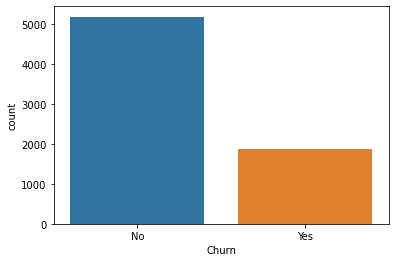

In [5]:
import seaborn as sns
sns.countplot(df["Churn"])

In [10]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']=="No")] 
df_minority = df[(df['Churn']=="Yes")] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5174, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])


In [7]:
df_majority

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [11]:
df_upsampled["Churn"].value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [12]:
df = df[["gender", "SeniorCitizen", "tenure", "Contract", "MonthlyCharges", "TotalCharges", "Churn"]]

In [13]:
df.loc[df["Churn"] == "No", "Churn"] = 0
df.loc[df["Churn"] == "Yes", "Churn"] = 1

In [14]:
df.head()

,gender,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,Month-to-month,29.85,29.85,0
1,Male,0,34,One year,56.95,1889.5,0
2,Male,0,2,Month-to-month,53.85,108.15,1
3,Male,0,45,One year,42.30,1840.75,0
4,Female,0,2,Month-to-month,70.70,151.65,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   SeniorCitizen   7043 non-null   int64  
 2   tenure          7043 non-null   int64  
 3   Contract        7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   object 
 6   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 385.3+ KB


In [16]:
df =df[~(df["TotalCharges"]== " ")]

In [17]:
df["MonthlyCharges"] = df["MonthlyCharges"].astype("float")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df["Churn"] = df["Churn"].astype("int")

In [18]:
#one hot encoding
df = pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,1,1,0,0
3,0,45,42.30,1840.75,0,0,1,0,1,0
4,0,2,70.70,151.65,1,1,0,1,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7032 non-null   int64  
 1   tenure                   7032 non-null   int64  
 2   MonthlyCharges           7032 non-null   float64
 3   TotalCharges             7032 non-null   float64
 4   Churn                    7032 non-null   int32  
 5   gender_Female            7032 non-null   uint8  
 6   gender_Male              7032 non-null   uint8  
 7   Contract_Month-to-month  7032 non-null   uint8  
 8   Contract_One year        7032 non-null   uint8  
 9   Contract_Two year        7032 non-null   uint8  
dtypes: float64(2), int32(1), int64(2), uint8(5)
memory usage: 336.5 KB


In [21]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [24]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [ ]:
## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

In [ ]:
## Decision Tree

In [26]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

In [ ]:
## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

In [ ]:
## Hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

In [ ]:
## Evaluation

In [ ]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf = rf_best.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_rf))

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))
print(precision_score(y_test, y_dtree, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))
print(recall_score(y_test, y_dtree, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf))